In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
    
import lidg

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# --- make instance ---
s0 = lidg.linear_span.LinearSpan("s0")

# --- read a text file or pandas DataFrame ---
s0.read("database/binary_alloy/alloy.dat")
s0.show()

# --- divide a target vector y ---
s0.set_y("M")


# --- add a constant vector "const"---
s0.add_const()
s0.show()

# --- change descriptor labels ---
s0.change_labels("x")

s0.show()

.read: text file
  .label_check

.show: s0 ( 8 )
  ['M', 'x', 'MA', 'ZA', 'MB', 'ZB', 'MAB', 'MBA']
    0  M
    1  x
    2  MA
    3  ZA
    4  MB
    5  ZB
    6  MAB
    7  MBA

.set_y:  
  s0.y     <---  'M'  in  s0 ( 8 )
  s0 ( 8 )   -   'M' 
  s0 ( 7 )

.add_const:  
  s0 ( 7 )   +   const ( 1 ) 
  s0 ( 8 )

.show: s0 ( 8 )
  ['const', 'x', 'MA', 'ZA', 'MB', 'ZB', 'MAB', 'MBA']
    0  const
    1  x
    2  MA
    3  ZA
    4  MB
    5  ZB
    6  MAB
    7  MBA

.change_labels: from x0
    0   x0   <---   const
    1   x1   <---   x
    2   x2   <---   MA
    3   x3   <---   ZA
    4   x4   <---   MB
    5   x5   <---   ZB
    6   x6   <---   MAB
    7   x7   <---   MBA
.save:  
  s0 ( 8 )  --->  s0_save ( 8 )
  s0 ( 8 )         s0_save ( 8 )

.show: s0 ( 8 )
  ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
    0  x0      (  =  const  )
    1  x1      (  =  x  )
    2  x2      (  =  MA  )
    3  x3      (  =  ZA  )
    4  x4      (  =  MB  )
    5  x5      (  =  ZB  )
    6  x6 

In [3]:
s0_sub = s0.sub(['x2', 'x3', 'x4', 'x5', 'x6', 'x7'],"s0_sub")
s0_sub_bo = s0_sub.gen_bo(["a","a+","a-"],"s0_sub_bo")
s1 = s0.join(s0_sub_bo,"s1")

.sub:  ['x2', 'x3', 'x4', 'x5', 'x6', 'x7']
  s0_sub ( 6 )  <---  s0 ( 6 )  in  s0 ( 8 )

Descriptor generation by basic operations:
  'a' : n = 6
  'a+' : 6C2 = 15
  'a-' : 6C2 = 15
  # of generated new descriptors: 36
.gen_bo:  ['a', 'a+', 'a-']
  s0_sub_bo ( 36 )  <---  s0_sub ( 6 )

.join:  
  s1 (44)  <---  s0 ( 8 )   +   s0_sub_bo ( 36 )



In [4]:
#s1_lid = s1.lid(spn_name="s_lid",normalize=False,tole1=None,tole2=None)
s1_lid = s1.lid(spn_name="s1_lid")

Find and remove multicollinearities:
  normalize = False
  coefficients are for descriptors with original scale (to obtain exact MCL relationships)

Shape: X (99, 44)
1/sqrt(m) = 0.10050378152592121
tole1 is given automatically.
tole2 is given automatically.
tole1, tole2 = 0.001005037815259212, 1.0050378152592119e-05

X is a rank deficient matrix ( pivot ( = 1.4589124023799135e-17)  <  tole2 ( = 1.0050378152592119e-05) )
Rank check: rk_np   = 10
                   rk_rref = 10
# of non-trivial solutions: 34 (= n - rk_rref)
Column order:
 [0, 1, 2, 3, 6, 33, 17, 28, 40, 35, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 36, 37, 38, 39, 41, 42, 43]
Space index: [ extra basis, [ basis ] ]
[4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 36, 37, 38, 39, 41, 42, 43, [0, 1, 2, 3, 6, 33, 17, 28, 40, 35]]

The form of multi-correlated descriptors
1 : x4 = (2.26)x0
2 : x5 = (8.0)x0
3 :

Ordinary Least Squares regression:
  normalize = True
  coefficients are for normalized descriptors (for a fair comparison of weights)

  e2 =  6.026001
  mse =  0.060869
  rmse =  0.246716
  R2 =  0.906386
  eq2 =  7.552861
  mseq =  0.076292
  rmseq =  0.276209
  Q2 =  0.882666

  TR2, TQ2, AIC =  0.971003,   0.963655,   23.845240

       Label         b       |b|  -log10(p)       G2      TRi2
1         x0 -37.16384  37.16384    0.25733  0.00397  0.999983
2         x1  11.61918  11.61918   39.72684  0.86488  0.714286
3         x2   8.59594   8.59594    0.49764  0.01121  0.999076
4         x3   9.93354   9.93354    0.35749  0.00674  0.999585
5         x6  -5.85424   5.85424    0.21362  0.00291  0.999487
6   a(x2-x7)   5.58933   5.58933    0.35466  0.00666  0.998707
7   a(x2+x6)   4.14081   4.14081    0.24963  0.00378  0.998668
8   a(x6+x7)   2.82153   2.82153    0.17879  0.00215  0.998369
9   a(x4-x7)   3.64850   3.64850    0.27455  0.00442  0.997992
10  a(x3-x5)  13.70821  13.70821  

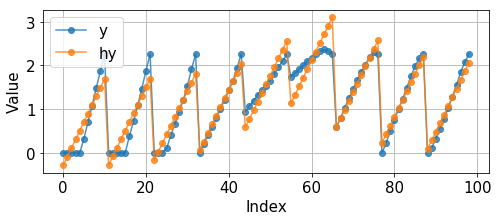

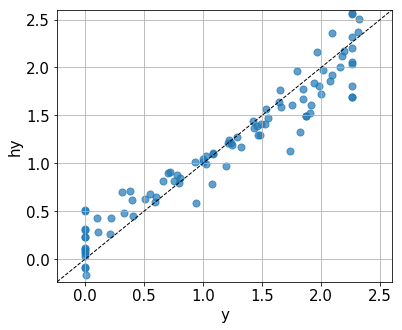

In [5]:
#=== .project(sort=None,normalize=False) ===
# R2        : coefficient of determination
# Q2        : R2 for leave-one-out cross validation.
# AIC       : Akaike information criterion.

# b         : regression coefficient
# -log10(p) : minus log 10 of p-val (importance of descriptor)
# G2        : an importance of descriptor (original criterion)
# TRi2      : strength of near multicollinearity

s1_lid.project(normalize=True)

Exhaustive search for 5 descriptors:  10C5 = 252
   5 %  (13/252)
  10 %  (26/252)
  15 %  (38/252)
  20 %  (51/252)
  25 %  (64/252)
  30 %  (76/252)
  35 %  (89/252)
  40 %  (101/252)
  45 %  (114/252)
  50 %  (127/252)
  55 %  (139/252)
  60 %  (152/252)
  65 %  (164/252)
  70 %  (177/252)
  75 %  (190/252)
  80 %  (202/252)
  85 %  (215/252)
  90 %  (227/252)
  95 %  (240/252)

Exhaustive search is finished. 100 %  (252/252)

Elapsed time for score calculatons
time: 0.06287312507629395 [s]
time/10C5 : 0.00024949652808053154 [s/ncomb]

Elapsed time for sorting (by e2)
time : 0.0019168853759765625 [s]
time/10C5 : 7.606687999906994e-06 [s/ncomb]

Displayed only top 20 (sorted by e2)
          e2        R2       eq2        Q2                       Descriptors
0   6.094796  0.905317  6.919070  0.892512        [x0, x1, x2, x3, a(x2-x7)]
1   6.176706  0.904044  7.008819  0.891117        [x0, x1, x2, x3, a(x4-x7)]
2   6.221269  0.903352  7.112804  0.889502  [x1, x2, x3, a(x4-x7), a(x3-x5)]

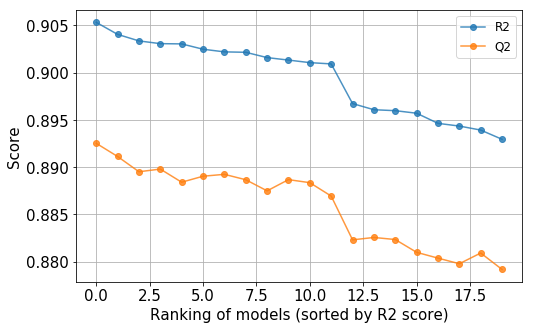

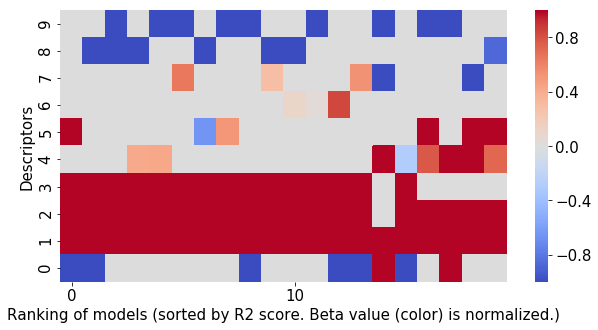


Elapsed time for sorting (by eq2)
time : 0.0016438961029052734 [s]
time/10C5 : 6.523397233751085e-06 [s/ncomb]

Displayed only top 20 (sorted by eq2)
          e2        R2       eq2        Q2                       Descriptors
0   6.094796  0.905317  6.919070  0.892512        [x0, x1, x2, x3, a(x2-x7)]
1   6.176706  0.904044  7.008819  0.891117        [x0, x1, x2, x3, a(x4-x7)]
2   6.221269  0.903063  7.112804  0.889785        [x1, x2, x3, x6, a(x4-x7)]
3   6.239881  0.903352  7.094591  0.889502  [x1, x2, x3, a(x4-x7), a(x3-x5)]
4   6.241606  0.902192  7.184138  0.889228  [x1, x2, x3, a(x2-x7), a(x4-x7)]
5   6.277910  0.902472  7.143293  0.889028  [x1, x2, x3, a(x6+x7), a(x3-x5)]
6   6.295930  0.901323  7.130424  0.888668  [x1, x2, x3, a(x6+x7), a(x4-x7)]
7   6.298793  0.902148  7.167166  0.888657  [x1, x2, x3, a(x2-x7), a(x3-x5)]
8   6.334982  0.903036  7.242933  0.888394        [x1, x2, x3, x6, a(x3-x5)]
9   6.351882  0.901053  7.166516  0.888345  [x1, x2, x3, a(x2+x6), a(x4-x7)]
10

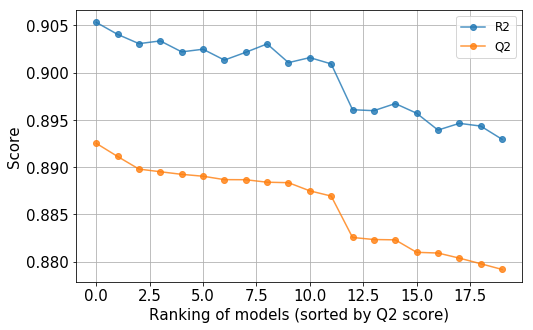

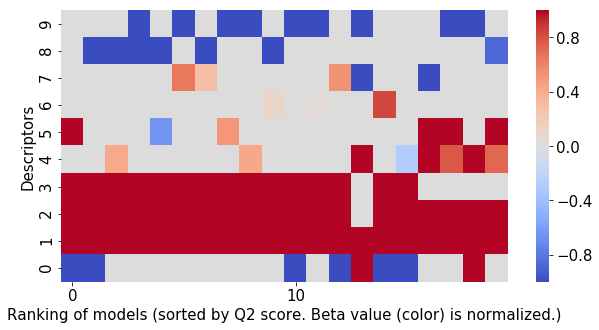

e_des:
['x0', 'x1', 'x2', 'x3', 'a(x2-x7)']
['x0', 'x1', 'x2', 'x3', 'a(x4-x7)']
['x1', 'x2', 'x3', 'a(x4-x7)', 'a(x3-x5)']
['x1', 'x2', 'x3', 'x6', 'a(x4-x7)']
['x1', 'x2', 'x3', 'x6', 'a(x3-x5)']
['x1', 'x2', 'x3', 'a(x6+x7)', 'a(x3-x5)']
['x1', 'x2', 'x3', 'a(x2-x7)', 'a(x4-x7)']
['x1', 'x2', 'x3', 'a(x2-x7)', 'a(x3-x5)']
['x0', 'x1', 'x2', 'x3', 'a(x3-x5)']
['x1', 'x2', 'x3', 'a(x6+x7)', 'a(x4-x7)']
['x1', 'x2', 'x3', 'a(x2+x6)', 'a(x4-x7)']
['x1', 'x2', 'x3', 'a(x2+x6)', 'a(x3-x5)']
['x0', 'x1', 'x2', 'x3', 'a(x2+x6)']
['x0', 'x1', 'x2', 'x3', 'a(x6+x7)']
['x0', 'x1', 'x6', 'a(x6+x7)', 'a(x3-x5)']
['x0', 'x1', 'x2', 'x3', 'x6']
['x1', 'x2', 'x6', 'a(x2-x7)', 'a(x3-x5)']
['x0', 'x1', 'x2', 'x6', 'a(x3-x5)']
['x1', 'x2', 'x6', 'a(x2-x7)', 'a(x6+x7)']
['x1', 'x2', 'x6', 'a(x2-x7)', 'a(x4-x7)']

q_des:
['x0', 'x1', 'x2', 'x3', 'a(x2-x7)']
['x0', 'x1', 'x2', 'x3', 'a(x4-x7)']
['x1', 'x2', 'x3', 'x6', 'a(x4-x7)']
['x1', 'x2', 'x3', 'a(x4-x7)', 'a(x3-x5)']
['x1', 'x2', 'x3', 'a(x2-x7)', 

In [6]:
# Exhaustive search

#s1_lid.exh_search(6,ntop=20,const=False)
e_des,q_des = s1_lid.exh_search(5)

print("e_des:")
for des in e_des:
    print(des)
    
print()
print("q_des:")
for des in q_des:
    print(des)

Genetic Algorithm for 5 descriptors:  10C5 = 252
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0    79   26.1102   6.23988   (0111100010)
   1   108   11.3726   6.17671   (1111000010)
   2   124   8.43165   6.0948   (1111010000)
   3   127   7.32394   6.0948   (1111010000)
   4   130   11.0963   6.0948   (1111010000)
   5   134   10.4403   6.0948   (1111010000)
   6   136   14.9608   6.0948   (1111010000)
   7   136   6.92395   6.0948   (1111010000)
   8   137   10.0361   6.0948   (1111010000)
   9   138   6.64989   6.0948   (1111010000)
  10   139   8.69031   6.0948   (1111010000)
  11   140   11.6943   6.0948   (1111010000)
  12   141   11.1107   6.0948   (1111010000)
  13   142   8.98656   6.0948   (1111010000)
  14   142   8.94778   6.0948   (1111010000)
  15   143   12.0638   6.0948   (1111010000)
  16   144   10.938   6.0948   (1111010000)
  17   144   8.86464   6.0948   (111101000

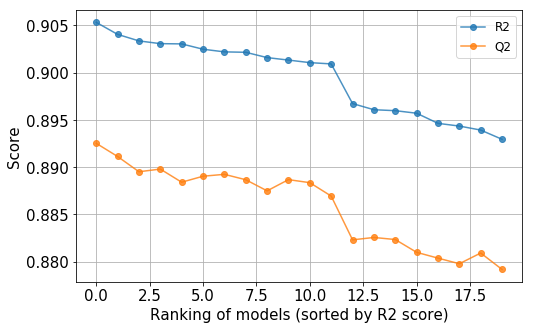

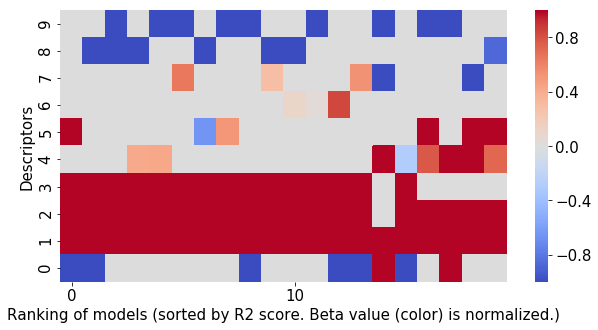

['x0', 'x1', 'x2', 'x3', 'a(x2-x7)']
['x0', 'x1', 'x2', 'x3', 'a(x4-x7)']
['x1', 'x2', 'x3', 'a(x4-x7)', 'a(x3-x5)']
['x1', 'x2', 'x3', 'x6', 'a(x4-x7)']
['x1', 'x2', 'x3', 'x6', 'a(x3-x5)']
['x1', 'x2', 'x3', 'a(x6+x7)', 'a(x3-x5)']
['x1', 'x2', 'x3', 'a(x2-x7)', 'a(x4-x7)']
['x1', 'x2', 'x3', 'a(x2-x7)', 'a(x3-x5)']
['x0', 'x1', 'x2', 'x3', 'a(x3-x5)']
['x1', 'x2', 'x3', 'a(x6+x7)', 'a(x4-x7)']
['x1', 'x2', 'x3', 'a(x2+x6)', 'a(x4-x7)']
['x1', 'x2', 'x3', 'a(x2+x6)', 'a(x3-x5)']
['x0', 'x1', 'x2', 'x3', 'a(x2+x6)']
['x0', 'x1', 'x2', 'x3', 'a(x6+x7)']
['x0', 'x1', 'x6', 'a(x6+x7)', 'a(x3-x5)']
['x0', 'x1', 'x2', 'x3', 'x6']
['x1', 'x2', 'x6', 'a(x2-x7)', 'a(x3-x5)']
['x0', 'x1', 'x2', 'x6', 'a(x3-x5)']
['x1', 'x2', 'x6', 'a(x2-x7)', 'a(x6+x7)']
['x1', 'x2', 'x6', 'a(x2-x7)', 'a(x4-x7)']


In [7]:
# GA

#s1_lid.ga_search(k,score="e2",ntop=20,n_gen=30,nmax_pop=100,n_tou=5,p_gap=0.9,p_crs=0.9,p_mut=0.1,n_mut=1)
des = s1_lid.ga_search(5,"e2")

for d in des:
    print(d)

    
# I recommend　running GA search several times (at least 10) with small (default) n_gen or nmax_pop 
# rather than running GA only once with large n_gen or nmax_pop.
    

Elastic net calculation (by sklearn)
Constant descriptors ['x0'] are ignored.


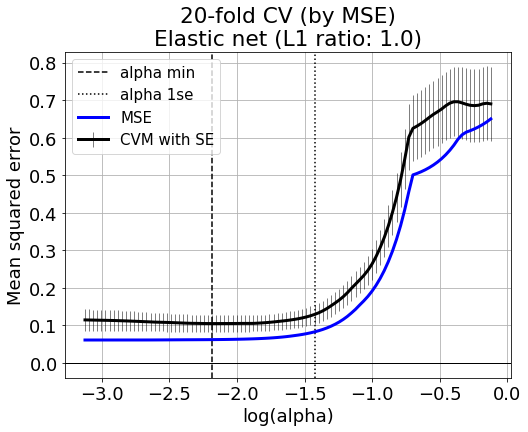

log10(amin)=-2.1834123309982805
log10(a1se)=-1.425836573422523

Normalize = False
  coefficients are for descriptors with original scale

       Label    b_amin  |b_amin|    b_a1se  |b_a1se|
1      const  0.166494  0.166494  0.528519  0.528519
2         x1  1.908342  1.908342  1.598780  1.598780
3         x2  0.396593  0.396593  0.180532  0.180532
4         x3  0.033986  0.033986  0.031028  0.031028
5         x6  0.052456  0.052456  0.060693  0.060693
6   a(x2-x7)  0.000000  0.000000  0.000000  0.000000
7   a(x2+x6)  0.000000  0.000000  0.000000  0.000000
8   a(x6+x7)  0.000000  0.000000  0.023184  0.023184
9   a(x4-x7) -0.052994  0.052994 -0.000000  0.000000
10  a(x3-x5) -0.085605  0.085605 -0.158734  0.158734

Selected descriptors:
At alpha = amin
  R2: 0.90428469402458
  Mean R2 (~Q2): 0.8385111359034889

  Descriptors with a non-zero coefficient ( |b_amin| > 0.0 ) : (7)
    ['const', 'x1', 'x2', 'x3', 'x6', 'a(x4-x7)', 'a(x3-x5)']

  Descriptors with a coefficient |b_amin| >= 0.001

In [8]:
#s1_lid.eln_search(l1r=1.0,eps=0.001,kf=20,intercept=True,norm=False,itr=1000,zero=0.001)

# "l1r" = 1.0 for LASSO and  "l1r" = 0.0 for Ridge.
# "kf" means fold number for cross validation. 

s1_lid.eln_search()

In [9]:
# Second order generation

s2_gen = s1_lid.gen_dp(2)
s2 = s1_lid.join(s2_gen,"s2")
s2.show()

Descriptor generation by direct product:
  Constant descriptors ['x0'] are ignored.
  # of generated new descriptors: 9H2 = 10C2 = 45
.gen_dp:  k=2
  s_gen_dp ( 45 )  <---  s1_lid ( 9 )

.join:  
  s2 (55)  <---  s1_lid ( 10 )   +   s_gen_dp ( 45 )

.show: s2 ( 55 )
  ['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x2*x2', 'x2*x3', 'x2*x6', 'x2*a(x2-x7)', 'x2*a(x2+x6)', 'x2*a(x6+x7)', 'x2*a(x4-x7)', 'x2*a(x3-x5)', 'x3*x3', 'x3*x6', 'x3*a(x2-x7)', 'x3*a(x2+x6)', 'x3*a(x6+x7)', 'x3*a(x4-x7)', 'x3*a(x3-x5)', 'x6*x6', 'x6*a(x2-x7)', 'x6*a(x2+x6)', 'x6*a(x6+x7)', 'x6*a(x4-x7)', 'x6*a(x3-x5)', 'a(x2-x7)*a(x2-x7)', 'a(x2-x7)*a(x2+x6)', 'a(x2-x7)*a(x6+x7)', 'a(x2-x7)*a(x4-x7)', 'a(x2-x7)*a(x3-x5)', 'a(x2+x6)*a(x2+x6)', 'a(x2+x6)*a(x6+x7)', 'a(x2+x6)*a(x4-x7)', 'a(x2+x6)*a(x3-x5)', 'a(x6+x7)*a(x6+x7)', 'a(x6+x7)*a(x4-x7)', 'a(x6+x7)*a(x3-x5)'

In [10]:
s2_lid = s2.lid()

Find and remove multicollinearities:
  normalize = False
  coefficients are for descriptors with original scale (to obtain exact MCL relationships)

Shape: X (99, 55)
1/sqrt(m) = 0.10050378152592121
tole1 is given automatically.
tole2 is given automatically.
tole1, tole2 = 0.001005037815259212, 1.0050378152592119e-05

X is a rank deficient matrix ( pivot ( = 2.711934484383683e-17)  <  tole2 ( = 1.0050378152592119e-05) )
Rank check: rk_np   = 19
                   rk_rref = 19
# of non-trivial solutions: 36 (= n - rk_rref)
Column order:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
Space index: [ extra basis, [ basis ] ]
[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17

Ordinary Least Squares regression:
  normalize = False
  coefficients are for descriptors with original scale

  e2 =  1.993148
  mse =  0.020133
  rmse =  0.141890
  R2 =  0.969036
  eq2 =  3.579584
  mseq =  0.036157
  rmseq =  0.190151
  Q2 =  0.944391

  TR2, TQ2, AIC =  0.990409,   0.982775,  -67.685204

          Label        b      |b|  -log10(p)       G2      TRi2
1            x0 -3.45109  3.45109    0.20133  0.00293  0.999995
2            x1  0.82757  0.82757    0.02442  0.00006  0.999995
3            x2  1.70549  1.70549    0.63232  0.01772  0.999736
4            x3  0.11551  0.11551    0.27890  0.00504  0.999882
5            x6 -0.45426  0.45426    0.16436  0.00207  0.999853
6      a(x2-x7)  0.40220  0.40220    0.29253  0.00545  0.999631
7      a(x2+x6)  0.27028  0.27028    0.21271  0.00322  0.999619
8      a(x6+x7)  0.08420  0.08420    0.09719  0.00081  0.999534
9      a(x4-x7)  0.19968  0.19968    0.19018  0.00266  0.999426
10     a(x3-x5)  0.40563  0.40563    0.16082  0.0

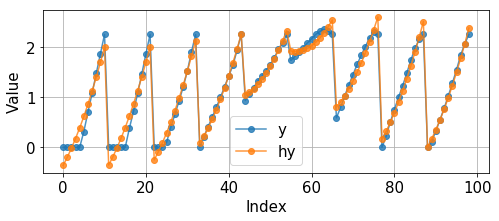

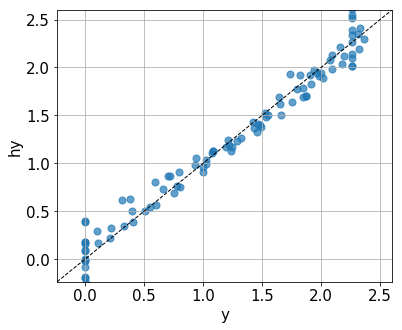

In [11]:
s2_lid.project()

Exhaustive search for 9 descriptors:  19C9 = 92378
   5 %  (4619/92378)
  10 %  (9238/92378)
  15 %  (13857/92378)
  20 %  (18476/92378)
  25 %  (23095/92378)
  30 %  (27714/92378)
  35 %  (32333/92378)
  40 %  (36952/92378)
  45 %  (41571/92378)
  50 %  (46190/92378)
  55 %  (50808/92378)
  60 %  (55427/92378)
  65 %  (60046/92378)
  70 %  (64665/92378)
  75 %  (69284/92378)
  80 %  (73903/92378)
  85 %  (78522/92378)
  90 %  (83141/92378)
  95 %  (87760/92378)

Exhaustive search is finished. 100 %  (92378/92378)

Elapsed time for score calculatons
time: 9.63778305053711 [s]
time/19C9 : 0.00010432985181035646 [s/ncomb]

Elapsed time for sorting (by e2)
time : 0.02290511131286621 [s]
time/19C9 : 2.479498507530604e-07 [s/ncomb]

Displayed only top 20 (sorted by e2)
          e2        R2       eq2        Q2  \
0   2.059529  0.968005  2.582922  0.959874   
1   2.072175  0.967809  2.576521  0.959974   
2   2.074496  0.967773  2.615538  0.959367   
3   2.074693  0.967769  2.589845  0.95976

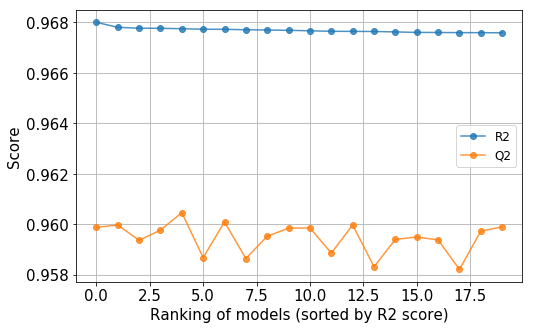

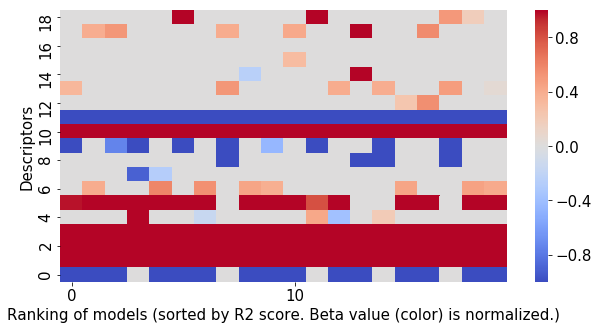


Elapsed time for sorting (by eq2)
time : 0.021273136138916016 [s]
time/19C9 : 2.3028357551490632e-07 [s/ncomb]

Displayed only top 20 (sorted by eq2)
          e2        R2       eq2        Q2  \
0   2.059529  0.967753  2.582922  0.960463   
1   2.072175  0.967576  2.576521  0.960126   
2   2.074496  0.967491  2.615538  0.960120   
3   2.074693  0.967730  2.589845  0.960093   
4   2.075744  0.967647  2.545022  0.959974   
5   2.077098  0.967809  2.659783  0.959974   
6   2.077248  0.967591  2.568837  0.959897   
7   2.078405  0.967495  2.662107  0.959880   
8   2.079109  0.968005  2.605338  0.959874   
9   2.079795  0.967573  2.584593  0.959865   
10  2.081077  0.967670  2.584112  0.959856   
11  2.082381  0.967690  2.648268  0.959848   
12  2.082555  0.967393  2.576467  0.959847   
13  2.082829  0.967573  2.683154  0.959838   
14  2.083918  0.967769  2.613338  0.959767   
15  2.085183  0.967437  2.607301  0.959753   
16  2.085344  0.967596  2.614604  0.959731   
17  2.085787  0.96749

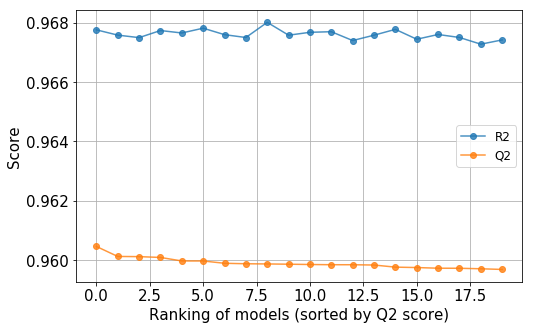

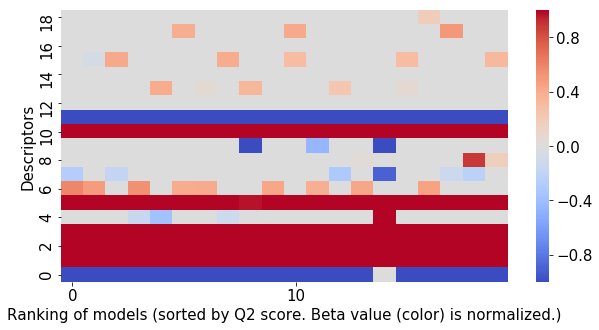

[['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x6'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x2+x6)', 'x1*x1', 'x1*x2', 'x1*a(x4-x7)'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*a(x4-x7)'], ['x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x6+x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'x1*x1', 'x1*x2'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*a(x3-x5)'], ['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'x1*x1', 'x1*x2'], ['x1', 'x2', 'x3', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x6', 'x1*a(x4-x7)'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x2+x6)', 'x1*x1', 'x1*x2', 'x1*a(x2-x7)'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x2+x6)', 'a(x3-x5)', 'x1*x1', 'x1*x2'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'x1*x1', 'x1*x2', 'x1*a(x2+x6)', 'x1*a(x4-x7)'], ['x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*a(x3-x5)'], ['x0', 'x1', 'x2', 'x

In [12]:
e_des,q_des = s2_lid.exh_search(9)
print(e_des)

Genetic Algorithm for 9 descriptors:  19C9 = 92378
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   100   6.63984   2.09261   (1111010100110001000)
   1   177   3.69952   2.09261   (1111010100110001000)
   2   247   3.0722   2.07574   (1111011100110000000)
   3   306   2.44626   2.07574   (1111011100110000000)
   4   334   2.23085   2.07574   (1111011100110000000)
   5   360   2.24823   2.05953   (1111010001110100000)
   6   380   2.25506   2.05953   (1111010001110100000)
   7   403   2.30207   2.05953   (1111010001110100000)
   8   415   2.30191   2.05953   (1111010001110100000)
   9   420   2.37911   2.05953   (1111010001110100000)
  10   431   2.40385   2.05953   (1111010001110100000)
  11   448   2.4032   2.05953   (1111010001110100000)
  12   458   2.2421   2.05953   (1111

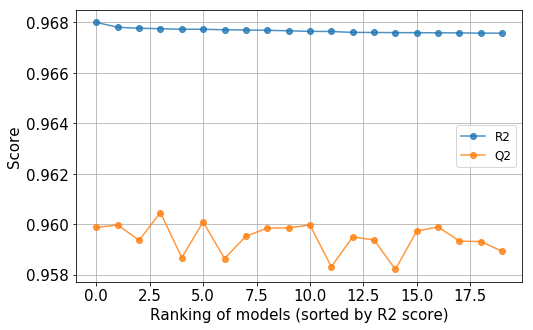

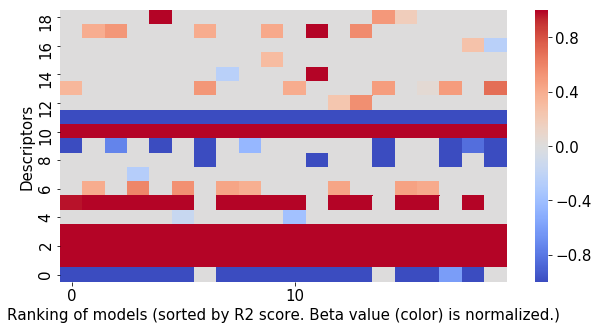

[['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x6'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x2+x6)', 'x1*x1', 'x1*x2', 'x1*a(x4-x7)'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*a(x4-x7)'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'x1*x1', 'x1*x2'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*a(x3-x5)'], ['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'x1*x1', 'x1*x2'], ['x1', 'x2', 'x3', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x6', 'x1*a(x4-x7)'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x2+x6)', 'x1*x1', 'x1*x2', 'x1*a(x2-x7)'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'a(x2+x6)', 'a(x3-x5)', 'x1*x1', 'x1*x2'], ['x0', 'x1', 'x2', 'x3', 'a(x2-x7)', 'x1*x1', 'x1*x2', 'x1*a(x2+x6)', 'x1*a(x4-x7)'], ['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'x1*x1', 'x1*x2', 'x1*x6'], ['x0', 'x1', 'x2', 'x3', 'a(x4-x7)', 'x1*x1', 'x1*x2', 'x1*a(x2-x7)', 'x1*a(x4-x7)'], ['x0', 'x1', 'x2', 'x3', 'a

In [13]:
des = s2_lid.ga_search(9)
print(des)

In [14]:
# Third order generation
# Caution! not s2_lid.gen_dp() but s1_lid.gen_dp()
s3_gen = s1_lid.gen_dp(3)
s3 = s2_lid.join(s3_gen)
s3.show()

Descriptor generation by direct product:
  Constant descriptors ['x0'] are ignored.
  # of generated new descriptors: 9H3 = 11C3 = 165
.gen_dp:  k=3
  s_gen_dp ( 165 )  <---  s1_lid ( 9 )

.join:  
  s_join (184)  <---  s_lid ( 19 )   +   s_gen_dp ( 165 )

.show: s_join ( 184 )
  ['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)', 'x1*x2*x2', 'x1*x2*x3', 'x1*x2*x6', 'x1*x2*a(x2-x7)', 'x1*x2*a(x2+x6)', 'x1*x2*a(x6+x7)', 'x1*x2*a(x4-x7)', 'x1*x2*a(x3-x5)', 'x1*x3*x3', 'x1*x3*x6', 'x1*x3*a(x2-x7)', 'x1*x3*a(x2+x6)', 'x1*x3*a(x6+x7)', 'x1*x3*a(x4-x7)', 'x1*x3*a(x3-x5)', 'x1*x6*x6', 'x1*x6*a(x2-x7)', 'x1*x6*a(x2+x6)', 'x1*x6*a(x6+x7)', 'x1*x6*a(x4-x7)', 'x1*x6*a(x3-x5)', 'x1*a(x2-x7)*a(x2-x7)', 'x1*a(x2-x7)*

In [15]:
s3_lid = s3.lid()

Find and remove multicollinearities:
  normalize = False
  coefficients are for descriptors with original scale (to obtain exact MCL relationships)

Shape: X (99, 184)
1/sqrt(m) = 0.10050378152592121
tole1 is given automatically.
tole2 is given automatically.
tole1, tole2 = 0.001005037815259212, 1.0050378152592119e-05

X is a rank deficient matrix ( pivot ( = 2.8880516684745607e-16)  <  tole2 ( = 1.0050378152592119e-05) )
Rank check: rk_np   = 28
                   rk_rref = 28
# of non-trivial solutions: 156 (= n - rk_rref)
Column order:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112

Ordinary Least Squares regression:
  normalize = False
  coefficients are for descriptors with original scale

  e2 =  0.185615
  mse =  0.001875
  rmse =  0.043300
  R2 =  0.997116
  eq2 =  0.469715
  mseq =  0.004745
  rmseq =  0.068881
  Q2 =  0.992703

  TR2, TQ2, AIC =  0.999107,   0.997740,  -284.690920

             Label         b       |b|  -log10(p)       G2      TRi2
1               x0   1.85727   1.85727    0.25750  0.00499  0.999997
2               x1 -34.93527  34.93527    1.73357  0.07571  1.000000
3               x2   0.68959   0.68959    0.56759  0.01706  0.999855
4               x3  -0.05385   0.05385    0.30129  0.00644  0.999935
5               x6   0.29862   0.29862    0.26555  0.00525  0.999920
6         a(x2-x7)  -0.10729   0.10729    0.16261  0.00229  0.999797
7         a(x2+x6)  -0.12823   0.12823    0.23406  0.00426  0.999791
8         a(x6+x7)  -0.11811   0.11811    0.38034  0.00932  0.999745
9         a(x4-x7)  -0.10679   0.10679    0.24101  0.00447  0.99968

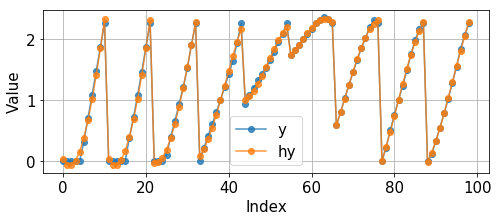

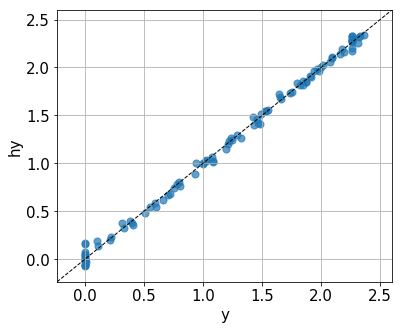

In [16]:
s3_lid.project()

Exhaustive search for 7 descriptors:  28C7 = 1184040
   5 %  (59202/1184040)
  10 %  (118404/1184040)
  15 %  (177606/1184040)
  20 %  (236808/1184040)
  25 %  (296010/1184040)
  30 %  (355212/1184040)
  35 %  (414414/1184040)
  40 %  (473616/1184040)
  45 %  (532818/1184040)
  50 %  (592020/1184040)
  55 %  (651222/1184040)
  60 %  (710424/1184040)
  65 %  (769626/1184040)
  70 %  (828828/1184040)
  75 %  (888030/1184040)
  80 %  (947232/1184040)
  85 %  (1006434/1184040)
  90 %  (1065636/1184040)
  95 %  (1124838/1184040)
 100 %  (1184040/1184040)

Exhaustive search is finished. 100 %  (1184040/1184040)

Elapsed time for score calculatons
time: 105.49137926101685 [s]
time/28C7 : 8.909443875292798e-05 [s/ncomb]

Elapsed time for sorting (by e2)
time : 0.4788799285888672 [s]
time/28C7 : 4.0444573543872435e-07 [s/ncomb]

Displayed only top 20 (sorted by e2)
          e2        R2       eq2        Q2  \
0   0.574262  0.991079  0.678671  0.989457   
1   0.605729  0.990590  0.718551  0.988

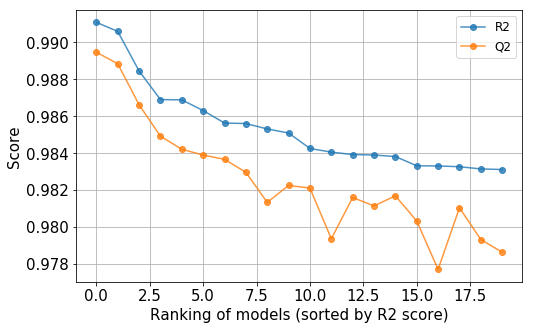

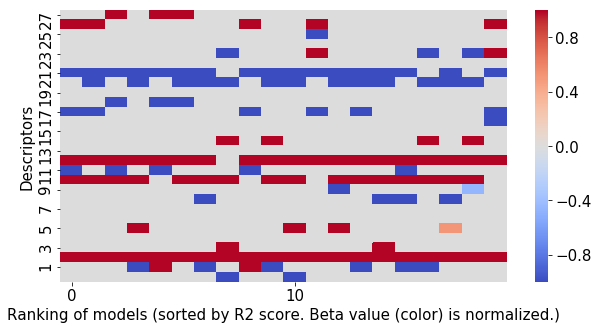


Elapsed time for sorting (by eq2)
time : 0.5036041736602783 [s]
time/28C7 : 4.253269937335549e-07 [s/ncomb]

Displayed only top 20 (sorted by eq2)
          e2        R2       eq2        Q2  \
0   0.574262  0.991079  0.678671  0.989457   
1   0.605729  0.990590  0.718551  0.988837   
2   0.743974  0.988442  0.862004  0.986609   
3   0.843841  0.986891  0.971500  0.984908   
4   0.844772  0.986876  1.017343  0.984195   
5   0.882243  0.986294  1.037527  0.983882   
6   0.925774  0.985618  1.052406  0.983651   
7   0.927454  0.985592  1.097638  0.982948   
8   0.946297  0.985077  1.202604  0.982236   
9   0.960629  0.984241  1.143503  0.982091   
10  1.014441  0.983803  1.152817  0.981673   
11  1.027331  0.983911  1.329889  0.981581   
12  1.035636  0.985299  1.185617  0.981317   
13  1.037366  0.983884  1.215087  0.981124   
14  1.042632  0.983250  1.179706  0.981023   
15  1.075004  0.982973  1.267880  0.980904   
16  1.075534  0.983022  1.436773  0.980827   
17  1.078197  0.982837  

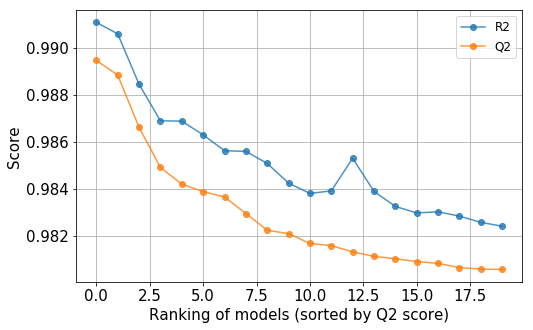

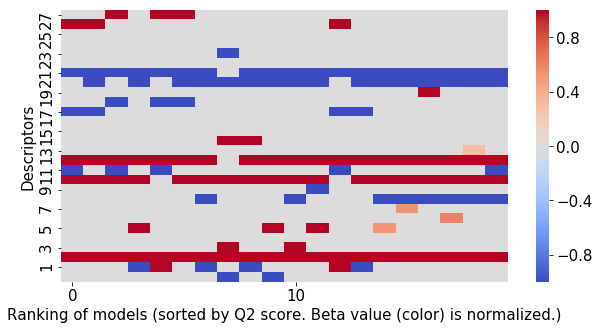

In [17]:
e_des,q_des = s3_lid.exh_search(7)

Genetic Algorithm for 7 descriptors:  28C7 = 1184040
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   200   12.4775   2.43345   (1011000000000010001100000010)
   1   355   7.93609   1.42896   (0111000000011000010000000010)
   2   499   4.58456   1.42896   (0111000000011000010000000010)
   3   649   3.88926   1.29584   (0111000000001000010010000010)
   4   783   3.12355   0.960629   (0110000000101010000011000000)
   5   881   3.01912   0.960629   (0110000000101010000011000000)
   6   974   3.00914   0.960629   (0110000000101010000011000000)
   7  1047   2.74444   0.960629   (0110000000101010000011000000)
   8  1123   2.65411   0.574262   (0010

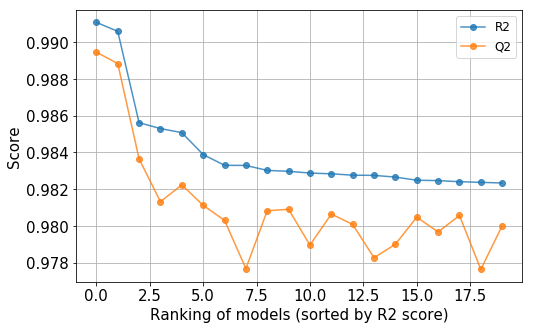

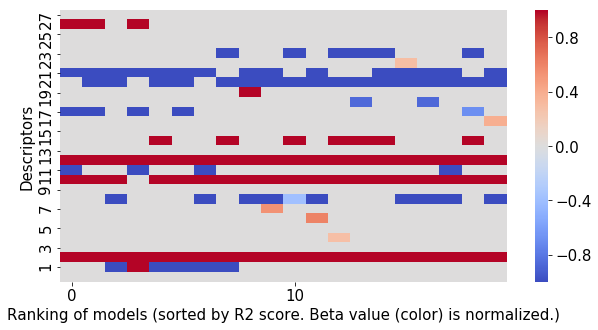

Genetic Algorithm for 7 descriptors:  28C7 = 1184040
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   200   13.0426   2.20668   (0010010000101100000010100000)
   1   356   8.09344   1.20659   (0010000000101100001011000000)
   2   501   4.81149   1.20659   (0010000000101100001011000000)
   3   633   3.14535   1.09606   (0010000110101000000011000000)
   4   751   2.73215   1.09606   (0010000110101000000011000000)
   5   844   2.72217   1.03564   (0010010001101000000011000000)
   6   891   2.39527   0.882243   (0010000000101000001011000001)
   7   937   2.05704   0.605729   (0010000000101000010011000010)
   8   970   2.41418   0.574262   (001000

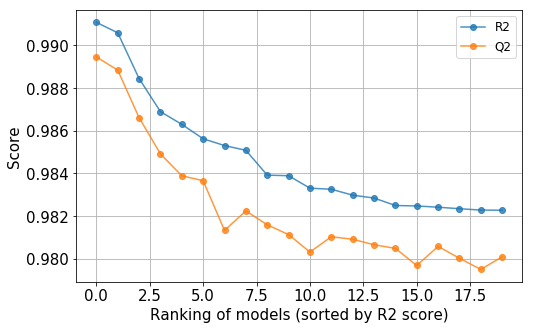

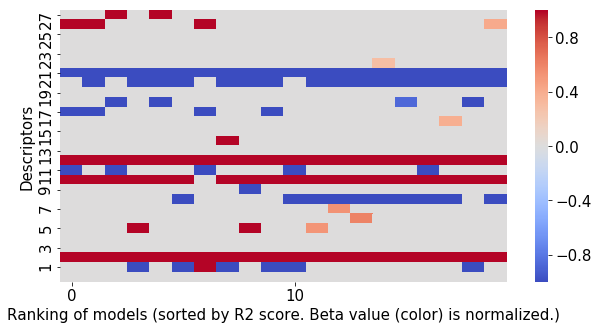

Genetic Algorithm for 7 descriptors:  28C7 = 1184040
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   200    13.15   1.0782   (0010010010101000000011000000)
   1   362   7.51611   1.0782   (0010010010101000000011000000)
   2   508   5.07512   1.0782   (0010010010101000000011000000)
   3   657   3.63128   1.01444   (1010010000101000000011000000)
   4   796   3.49324   0.925774   (0110000010101000000011000000)
   5   895   2.83221   0.843841   (0110010000101000000011000000)
   6   970   2.7009   0.605729   (0010000000101000010011000010)
   7  1041   2.51818   0.605729   (0010000000101000010011000010)
   8  1104   2.67296   0.605729   (001000000

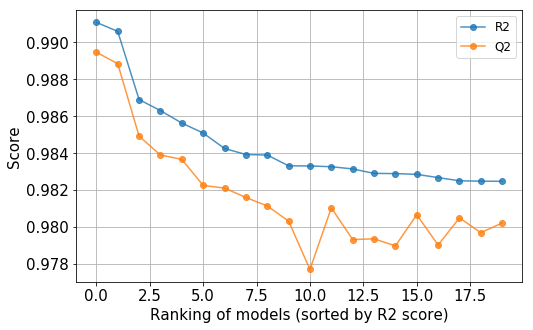

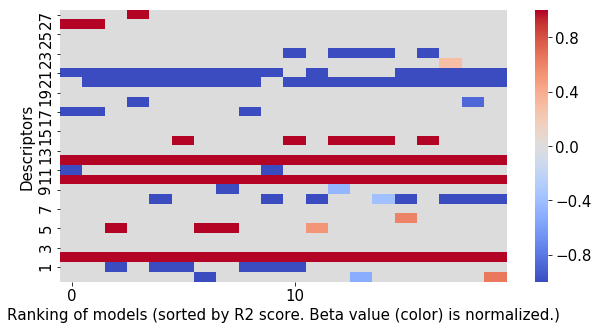

Genetic Algorithm for 7 descriptors:  28C7 = 1184040
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   200   12.9184   1.4372   (0010000000100010010011010000)
   1   362   8.96215   1.4372   (0010000000100010010011010000)
   2   519   5.72625   1.11627   (0010000000101010000011010000)
   3   660   3.93355   1.11627   (0010000000101010000011010000)
   4   789   3.1439   1.11627   (0010000000101010000011010000)
   5   883   3.04714   1.0954   (0011000001100010000010010000)
   6   956   2.77057   1.0954   (0011000001100010000010010000)
   7  1018   2.57569   0.605729   (0010000000101000010011000010)
   8  1061   2.44251   0.605729   (001000000010

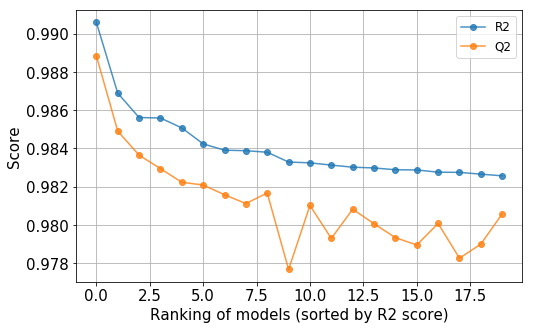

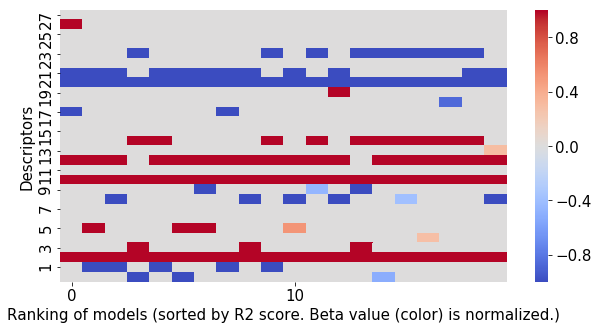

Genetic Algorithm for 7 descriptors:  28C7 = 1184040
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   200   13.4046   2.34806   (0111000000000011000000001010)
   1   361   7.8674   2.11737   (0010011000101001000010000000)
   2   511   4.98816   1.75863   (0111000001000010000000001010)
   3   652   3.63659   1.61393   (0011000101000010000010000010)
   4   787   2.87203   1.52931   (0011000001000010101000000010)
   5   912   3.02578   1.37427   (0010000000001010110001000010)
   6  1023   2.31467   1.35589   (0010000000101010000011000010)
   7  1113   2.04021   1.35589   (0010000000101010000011000010)
   8  1184   1.86712   1.22794   (0010000000

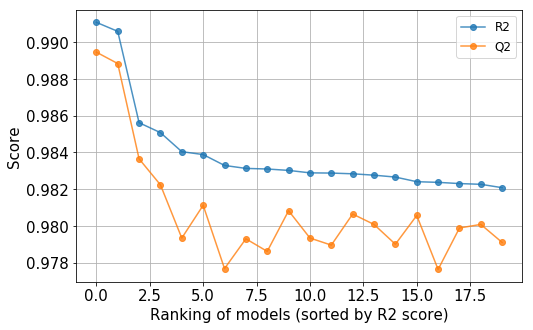

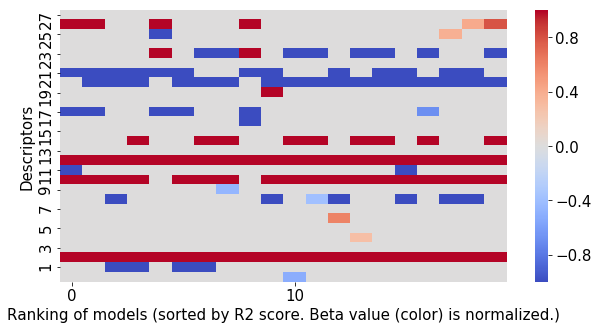

Genetic Algorithm for 7 descriptors:  28C7 = 1184040
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   200   13.606   2.60777   (0010000010000111000010000010)
   1   367   8.1235   1.83955   (1011000010000110000000000010)
   2   517   5.13404   1.69502   (1011000000000110000000001010)
   3   656   3.78508   1.44379   (0010000000101010000000100011)
   4   776   2.98734   1.40519   (0110000000001010000001100010)
   5   891   2.38141   1.27866   (0110000000001010010010000010)
   6   990   2.37119   1.27866   (0110000000001010010010000010)
   7  1046   1.95982   1.27866   (0110000000001010010010000010)
   8  1100   2.44072   1.27866   (01100000000

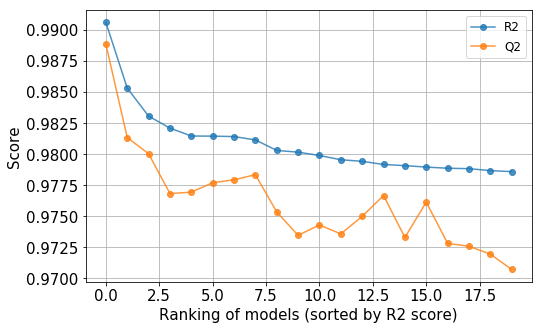

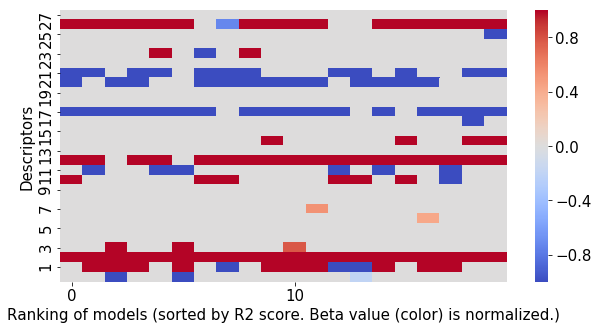

Genetic Algorithm for 7 descriptors:  28C7 = 1184040
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   200   12.8961   1.31788   (0110000100001000010010000010)
   1   353   8.05029   1.31788   (0110000100001000010010000010)
   2   507   4.49868   1.31788   (0110000100001000010010000010)
   3   642   3.29741   1.21506   (0110000000101000000011000010)
   4   753   3.13875   1.15386   (0110000000001000010011000010)
   5   843   2.67936   1.1416   (0010000010101000000011000010)
   6   899   2.77237   0.605729   (0010000000101000010011000010)
   7   946   2.56394   0.605729   (0010000000101000010011000010)
   8   986   2.83787   0.574262   (0010000

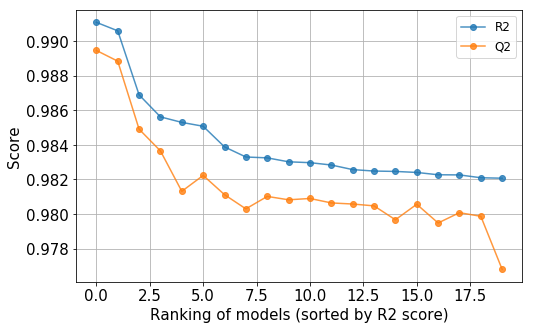

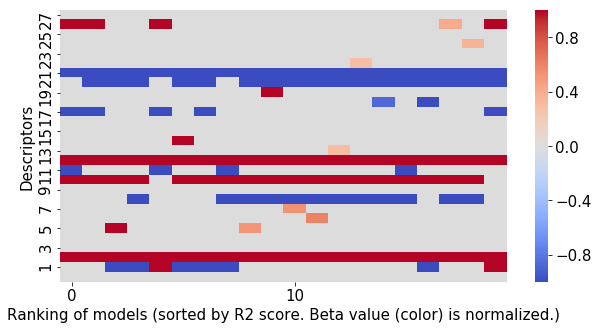

Genetic Algorithm for 7 descriptors:  28C7 = 1184040
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   200   13.7784   2.39679   (0010000000000010010000100111)
   1   360   7.87795   1.89756   (0011100001000010001000000010)
   2   515   4.69728   1.5207   (1011000000000110000010000010)
   3   654   3.39079   1.44273   (0010000000001010000010100011)
   4   779   2.35796   1.35589   (0010000000101010000011000010)
   5   858   2.30125   1.35589   (0010000000101010000011000010)
   6   927   2.10428   1.35589   (0010000000101010000011000010)
   7   990   2.11865   1.35589   (0010000000101010000011000010)
   8  1034   1.80294   1.35589   (0010000000

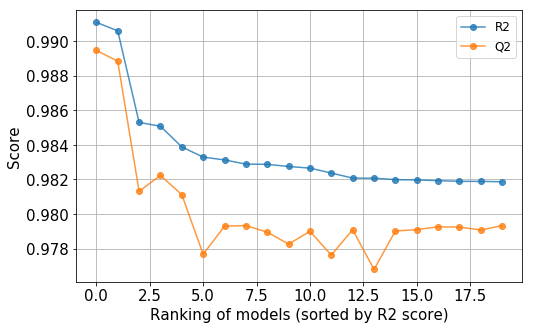

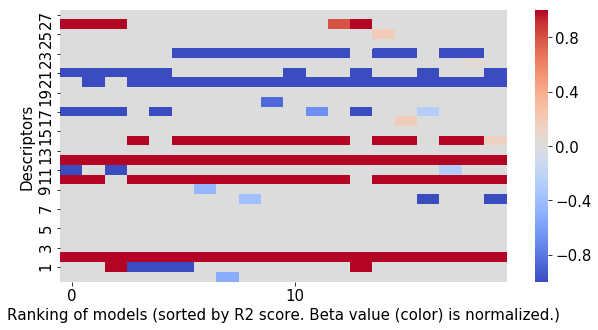

Genetic Algorithm for 7 descriptors:  28C7 = 1184040
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   200   12.7348   2.30658   (0010100000010010000000001110)
   1   355   7.7894   1.74479   (0011000000001010000100000110)
   2   499   5.33116   1.69069   (0010100000001010000000000111)
   3   629   3.92986   1.51149   (0010000000011010010000000110)
   4   752   2.81101   1.47387   (1011000000001010000000000110)
   5   847   2.45637   1.47387   (1011000000001010000000000110)
   6   914   2.13998   1.45337   (1011000000000010000000000111)
   7   967   2.29401   1.4037   (0010000000001110000010100010)
   8  1018   2.33908   1.38449   (00100000000

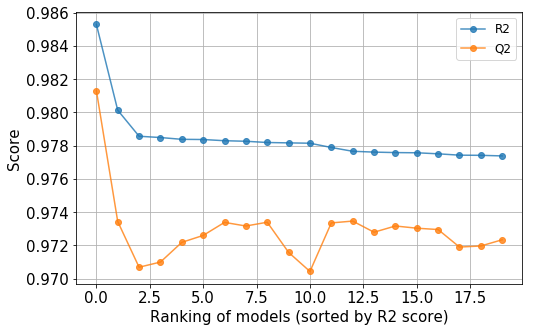

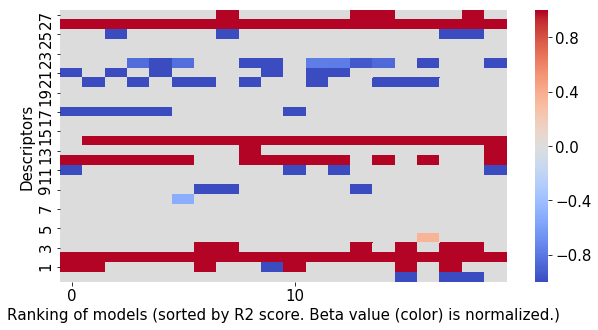

Genetic Algorithm for 7 descriptors:  28C7 = 1184040
['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*a(x2-x7)', 'x1*a(x2+x6)', 'x1*a(x6+x7)', 'x1*a(x4-x7)', 'x1*a(x3-x5)', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*a(x2-x7)', 'x1*x1*a(x2+x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x4-x7)', 'x1*x1*a(x3-x5)']
#gen  #cal  ave_score  best_score   best_individual
   0   200   13.1219   1.60602   (0011000001000010100000000110)
   1   363   7.98601   1.60602   (0011000001000010100000000110)
   2   528   4.91669   1.34741   (0110000000101000000011100000)
   3   673   3.60673   0.960629   (0110000000101010000011000000)
   4   806   2.88772   0.960629   (0110000000101010000011000000)
   5   928   2.69797   0.843841   (0110010000101000000011000000)
   6  1003   2.7596   0.843841   (0110010000101000000011000000)
   7  1060   2.21931   0.843841   (0110010000101000000011000000)
   8  1097   2.39045   0.843841   (0110

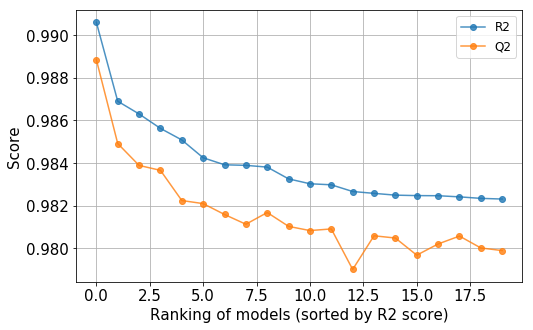

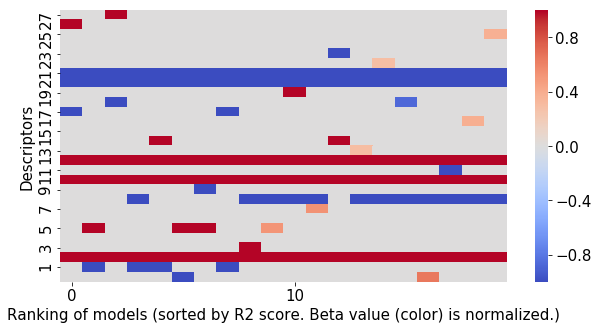

In [44]:
for _ in range(10):
    des = s3_lid.ga_search(7,nmax_pop=200)